<a href="https://colab.research.google.com/github/VhinyMombo/Boltzmann-Machine/blob/main/Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Modele Ising

In [2]:
#%%writefile -a IsingModel.py
from gzip import READ
import random
import numpy as np
import matplotlib.pyplot as plt

class IsingModel():
  def __init__(self,n,p,beta,nb_cycle,prob = 0.5):
    self._n = 50
    self._p = p
    self._proba = prob
    self.nb_cycle = nb_cycle
    self.beta = beta
    

  def __get_neighbours2(self, i,j):
    u = 1 if i+1 > self._n-1 else i+1
    a = self._n-1 if i-1 < 0 else i-1
    l = self._p-1 if j-1 < 0 else j-1
    r = 1 if j+1 > self._p-1 else j+1

    neighoors_coord = np.array([u,l,u,r,a,l,a,r]).reshape([4,2])
    return neighoors_coord

  def  get_params(self):
    
    return {'n' : self._n,
            'p' : self._p,
            'proba' : self._proba,
            'beta' : self.beta,
            'nb_cycle' : self.nb_cycle}

  def __update(self, i,j,mat2):
    sum_N_index= sum([mat2[k[0],k[1]] for k in self.__get_neighbours2(i,j)])

    pX_ij_cond_Nij  = 1/(1+np.exp(-2*self.beta * sum_N_index))
    
    mat2[i,j] = 2 * np.random.binomial(1,pX_ij_cond_Nij,1)-1
    return mat2.reshape(self._n,self._p).T

  def __call__(self):
    cycle = 1
    mat  = ((2 * np.random.binomial(1,self._proba,self._n * self._p)-1)
    .reshape([self._n, self._p]))
    mat2 = mat.copy()

    while(cycle <= self.nb_cycle):
      cycle+=1
      #print(cycle)
      walk_order = random.sample(list(range(self._n*self._p)),self._n*self._p)
      for i in range(self._n):
        for j in range(self._p):
          mat2 = self.__update(i,j,mat2)    
    return mat2



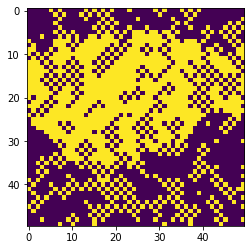

In [3]:
#%%writefile -a main.py
n = 50
p =  50
prob = 0.5
beta = 10
nb_cycle = 100
model = IsingModel(n,p,beta, nb_cycle,prob)
plt.imshow(model())

In [128]:
model.get_params()

{'beta': 3, 'n': 50, 'nb_cycle': 100, 'p': 50, 'proba': 0.5}

In [81]:
n = 1
p = 0.5
s = 2*np.random.binomial(1, p, 1)-1
s

array([1])

In [20]:
%%writefile -a Boltzmann.py

class BoltzmannModel(IsingModel):
  def __init__(self,n,p,beta, nb_cycle,prob,input_size, n_hidden_unit):
    super().__init__(n,p,beta,nb_cycle,prob)
    self._input_size = input_size
    self._n_hidden_unit = n_hidden_unit

  def  get_params(self):
    
    return {'n' : self._n,
            'p' : self._p,
            'proba' : self._proba,
            'beta' : self.beta,
            'nb_cycle' : self.nb_cycle,
            'input_size' : self._input_size,
            'n_hidden_unit' : self._n_hidden_unit}

    def __simul(self, v):
      cycle = 1
      mat  = ((2 * np.random.binomial(1,self._proba,self._n * self._p)-1)
      .reshape([self._n, self._p]))
      mat2 = mat.copy()

      while(cycle <= self.nb_cycle):
        cycle+=1
        #print(cycle)
        #walk_order = random.sample(list(range(self._n*self._p)),self._n*self._p)
        for i in range(self._n):
          for j in range(self._p):
            mat2 = self.__update(i,j,mat2)    
      return mat2

  def forward(self,x):
    x = x.flatten()
    h = np.random.random(self._n_hidden_unit)





  


Writing Boltzmann.py


In [19]:
np.random.random(2)

array([0.10857099, 0.19740791])

In [14]:
model2 = BoltzmannModel(n,p,beta, nb_cycle,prob,10, 5)

In [17]:
f = model2()